In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [0]:
df= pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter05/Datasets/online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Activity 5.01**

In [22]:
# Administrative duration vs Bounce Rate
x = df.iloc[:, [1, 6]].values
x.shape

(12330, 2)

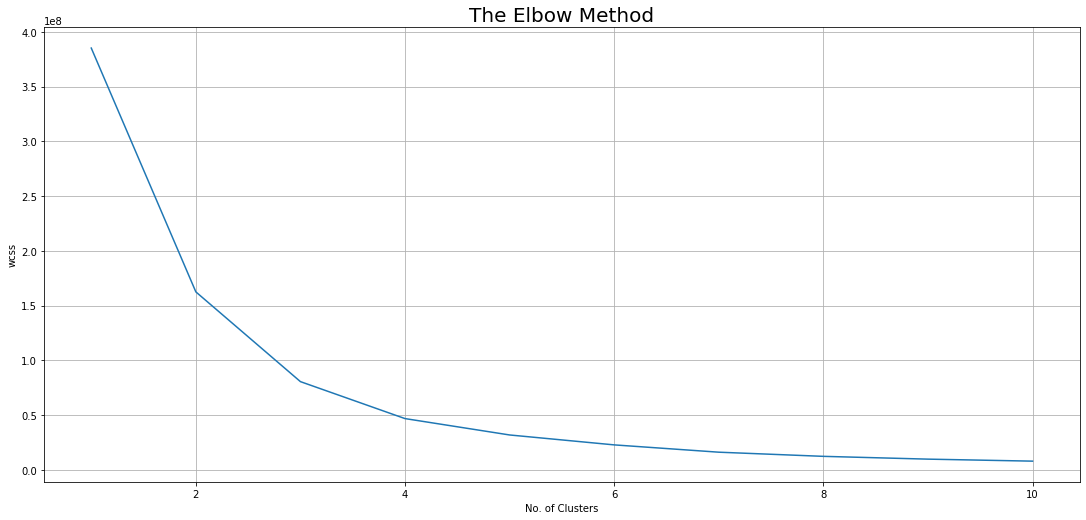

In [23]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

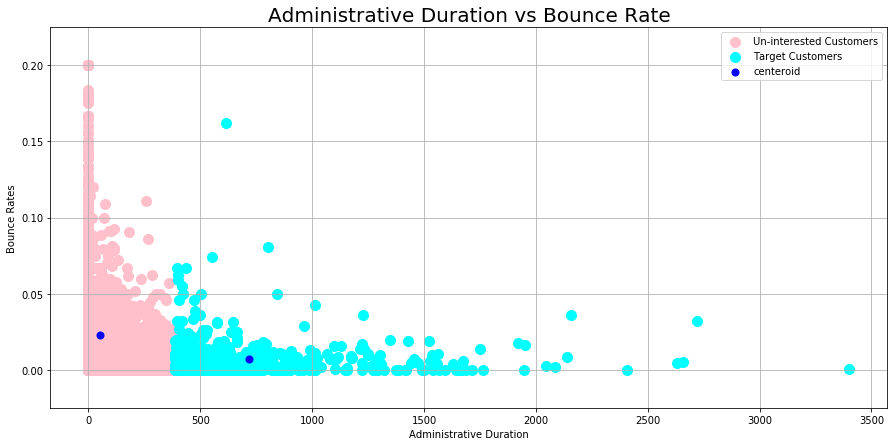

In [24]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

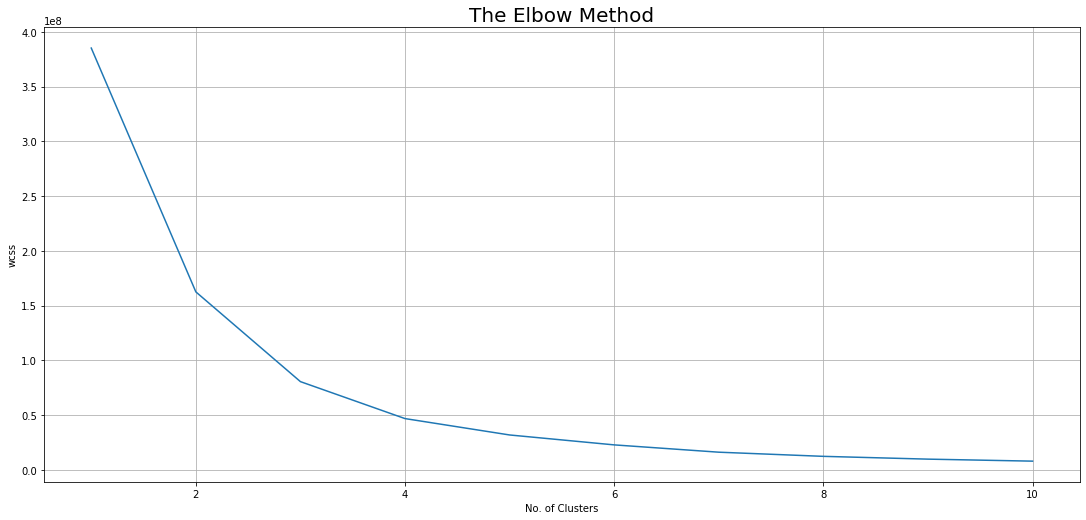

In [25]:
# Administrative duration vs Exit Rate
x = df.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

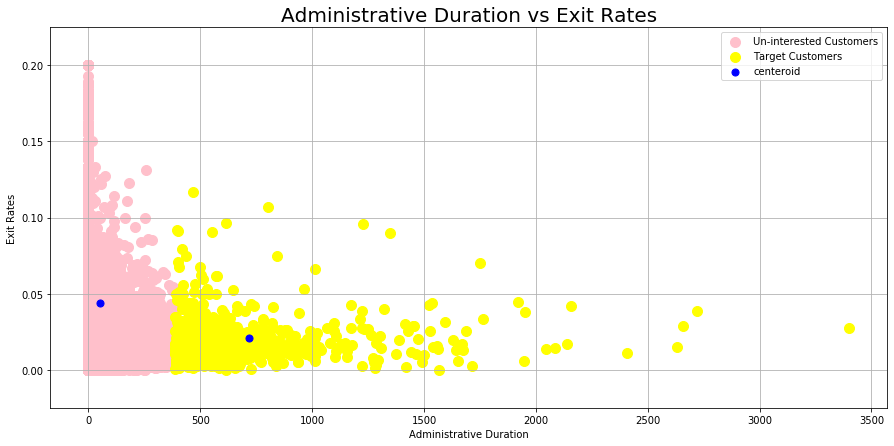

In [26]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()